# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Holmdel, New Jersey, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Holmdel, New Jersey, United States** to Ann Arbor, USA. In that case at least one source file must be about **Holmdel, New Jersey, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Holmdel, New Jersey, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Trend of Wages per capita versus GDP per capita in each county of NJ
Goal of Analysis is to see if there is a linear relationship between the GDP of industry per capita of each county and the average wage of each county. Additionally to see where Holmdel, NJ which is in Monmouth County falls. Additionally the New Jersey average is marked as well as color coding for each region of New Jersey (South, Central, North). With this analysis we can see where wages reflex GDP as well as see if Monmouth County and which Regions have the higher Wages and GDP per capita.

In [381]:
#Manipulate the GDP by county in New Jersey information: 
#https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=5#reqid=70&step=1&isuri=1&acrdn=5

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_csv("GDPbycountyinNJ.csv", skiprows=5)

df = df.drop(columns=['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'])

df = df.drop(df.index[770:])

df['Average']=df.apply(lambda row: pd.to_numeric(pd.Series(row.tolist()[4:]),errors='coerce').mean(),axis=1)


df['STD'] = df.std(axis = 1, skipna = True)

df_NJ = df[df['GeoName'] == "New Jersey"]

desc = pd.Series(df_NJ['Description'])

#df['Difference'] = []
#ans1 = [len(df.index)]

ans1 = np.empty(len(df.index), dtype=np.float)
i=0
while i < len(df.index):
    j = 0
    while j < len(desc):
        ans = df_NJ['Average'].where(df_NJ['Description'] == desc[j]).tolist()
        ans1[i] = (df.iloc[i,12] / ans[j])*100
        #print(ans1)
        dif.append(ans1) 
        j = j + 1
        i = i + 1
        
df["Difference"] = ans1 
df = df[df['LineCode'].isnull() == False ]

df_allI = df[df['Description'] == 'All industry total']

df_M = df[df['GeoName'] == "Monmouth, NJ"]

df_c = df[df['GeoName'] != "New Jersey"]
df_1 = df[df['LineCode'] == 1]
df_1['GeoName'] = df_1['GeoName'].str.split(",", 1).str[0]

df_1.sort_values(by=['Difference'], ascending=False)



<ipython-input-381-2d50aaf18630>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['GeoName'] = df_1['GeoName'].str.split(",", 1).str[0]


,GeoFips,GeoName,LineCode,Description,2011,2012,2013,2014,2015,2016,2017,2018,Average,STD,Difference
0,34000,New Jersey,1.0,All industry total,499114859,519745837,533686690,546686519,569679549,582427513,595324457,622002807,5.585835e+08,3.949782e+08,100.000000
70,34003,Bergen,1.0,All industry total,62907637,64632393,65467065,67192926,68877694,69905783,70394970,73548321,6.786585e+07,4.798840e+07,12.149633
420,34023,Middlesex,1.0,All industry total,50456949,53300947,54309937,55880739,58539222,60584217,61646522,64687010,5.742569e+07,4.060610e+07,10.280592
245,34013,Essex,1.0,All industry total,49438607,50609681,51313450,51743497,54584833,56129178,57022439,59018323,5.373250e+07,3.799462e+07,9.619421
490,34027,Morris,1.0,All industry total,46469787,48952201,50392973,50824837,53301876,55593810,56436236,58515215,5.256087e+07,3.716614e+07,9.409670
315,34017,Hudson,1.0,All industry total,36907719,39249245,41229832,42436654,45444230,46351341,49214339,51575916,4.405116e+07,3.114887e+07,7.886226
700,34039,Union,1.0,All industry total,32435134,34795237,36095031,37509950,37601467,37815020,38237132,40055247,3.681803e+07,2.603428e+07,6.591320
630,34035,Somerset,1.0,All industry total,27166017,28088357,30360046,32238200,34740972,36752719,38734259,40778240,3.360735e+07,2.376399e+07,6.016531
455,34025,Monmouth,1.0,All industry total,28896041,29755547,30571189,31465495,32492109,33395495,34095030,35826474,3.206217e+07,2.267138e+07,5.739907
385,34021,Mercer,1.0,All industry total,26147235,28346897,28660506,28921547,29766159,30588331,30706593,32093898,2.940390e+07,2.079169e+07,5.264011


In [210]:
#Manipulate New Jersey County Population Data 
#https://www.newjersey-demographics.com/counties_by_population

df_pop = pd.read_csv("NJCountyPopulation.csv", skiprows=0)

#Match County with GeoName
df_pop['County'] = df_pop['County'].str.split("County", 1).str[0]
df_pop['County'] = df_pop['County'].str.strip()

df_1.set_index('GeoName')
df_pop.set_index('County')

#Merge with GDP data 
df_Join1 = pd.merge(df_1, df_pop, how='outer', left_on='GeoName', right_on='County')

df_Join1.set_index('GeoName')

#Add total population of NJ
df_Join1.iloc[0, 17] = 8882000

df_Join1['GDP/POP'] = df_Join1['Average'] / df_Join1['Population']
df_Join1.sort_values(by=['GDP/POP'], ascending=False)

,GeoFips,GeoName,LineCode,Description,2011,2012,2013,2014,2015,2016,2017,2018,Average,STD,Difference,Rank,County,Population,GDP/POP
14,34027,Morris,1.0,All industry total,46469787,48952201,50392973,50824837,53301876,55593810,56436236,58515215,5.256087e+07,3.716614e+07,9.409670,10.0,Morris,491845.0,106.864697
18,34035,Somerset,1.0,All industry total,27166017,28088357,30360046,32238200,34740972,36752719,38734259,40778240,3.360735e+07,2.376399e+07,6.016531,13.0,Somerset,328934.0,102.170500
17,34033,Salem,1.0,All industry total,5770008,5629822,5884371,5885135,5631998,5097376,5464530,5730068,5.636664e+06,3.985722e+06,1.009099,21.0,Salem,62385.0,90.352865
11,34021,Mercer,1.0,All industry total,26147235,28346897,28660506,28921547,29766159,30588331,30706593,32093898,2.940390e+07,2.079169e+07,5.264011,12.0,Mercer,367430.0,80.025844
2,34003,Bergen,1.0,All industry total,62907637,64632393,65467065,67192926,68877694,69905783,70394970,73548321,6.786585e+07,4.798840e+07,12.149633,1.0,Bergen,932202.0,72.801655
12,34023,Middlesex,1.0,All industry total,50456949,53300947,54309937,55880739,58539222,60584217,61646522,64687010,5.742569e+07,4.060610e+07,10.280592,2.0,Middlesex,825062.0,69.601670
7,34013,Essex,1.0,All industry total,49438607,50609681,51313450,51743497,54584833,56129178,57022439,59018323,5.373250e+07,3.799462e+07,9.619421,3.0,Essex,798975.0,67.251793
20,34039,Union,1.0,All industry total,32435134,34795237,36095031,37509950,37601467,37815020,38237132,40055247,3.681803e+07,2.603428e+07,6.591320,7.0,Union,556341.0,66.178885
9,34017,Hudson,1.0,All industry total,36907719,39249245,41229832,42436654,45444230,46351341,49214339,51575916,4.405116e+07,3.114887e+07,7.886226,4.0,Hudson,672391.0,65.514202
0,34000,New Jersey,1.0,All industry total,499114859,519745837,533686690,546686519,569679549,582427513,595324457,622002807,5.585835e+08,3.949782e+08,100.000000,NaN,NaN,8882000.0,62.889386


In [224]:
#manipulate Wage Data by County in NJ
#https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=5#reqid=70&step=1&isuri=1&acrdn=5
df_ind = pd.read_csv("CompensationbyIndustrybycountyinNJ.csv", skiprows=5)

df_ind = df_ind[df_ind['LineCode'].isnull() == False ]

#Filter to all industry compensation Data
df_ind_wages = df_ind[df_ind['LineCode'] < 10]

df_ind_wages['GeoName'] = df_ind_wages['GeoName'].str.split(",", 1).str[0]

# handle NaN while averaging all the years 
df_ind_wages['Average']=df_ind_wages.apply(lambda row: pd.to_numeric(pd.Series(row.tolist()[4:]),errors='coerce').mean(),axis=1)

# Merge Population data with Wage data
df_JoinW = pd.merge(df_ind_wages, df_pop, how='outer', left_on='GeoName', right_on='County')

df_JoinW.set_index('GeoName')

#add total population
df_JoinW.iloc[0, 15] = 8882000
df_JoinW.iloc[1, 15] = 8882000
df_JoinW.iloc[2, 15] = 8882000
df_JoinW.iloc[3, 15] = 8882000
df_JoinW.iloc[4, 15] = 8882000

df_JoinW['Wages/POP'] = df_JoinW['Average'] / df_JoinW['Population']

#focus on Wages
df_JoinW = df_JoinW[df_JoinW['Description'] == '  Wages and salaries']
df_JoinW.sort_values(by=['Wages/POP'], ascending=False)


<ipython-input-224-f6a811f5886a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind_wages['GeoName'] = df_ind_wages['GeoName'].str.split(",", 1).str[0]
<ipython-input-224-f6a811f5886a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind_wages['Average']=df_ind_wages.apply(lambda row: pd.to_numeric(pd.Series(row.tolist()[4:]),errors='coerce').mean(),axis=1)


,GeoFips,GeoName,LineCode,Description,2011,2012,2013,2014,2015,2016,2017,2018,Average,Rank,County,Population,Wages/POP
109,34035,Somerset,5.0,Wages and salaries,13944651,14393460,15359860,16114926,16933370,17181562,17391506,17999202,1.616482e+07,13.0,Somerset,328934.0,49.143041
85,34027,Morris,5.0,Wages and salaries,20254455,21402611,22613593,23108051,24815483,24987406,26062025,26902000,2.376820e+07,10.0,Morris,491845.0,48.324580
67,34021,Mercer,5.0,Wages and salaries,13698248,14249145,14677628,15088784,15589825,16256752,16432018,17186981,1.539742e+07,12.0,Mercer,367430.0,41.905731
73,34023,Middlesex,5.0,Wages and salaries,23428776,24514598,25008807,25966447,27490951,28327399,29244529,30530752,2.681403e+07,2.0,Middlesex,825062.0,32.499415
13,34003,Bergen,5.0,Wages and salaries,26786693,27984716,28272288,29427382,30442196,30754565,31066463,32092983,2.960341e+07,1.0,Bergen,932202.0,31.756433
43,34013,Essex,5.0,Wages and salaries,21465825,21938017,22266709,22323808,23212921,23961855,24988208,26104856,2.328277e+07,3.0,Essex,798975.0,29.140805
55,34017,Hudson,5.0,Wages and salaries,17180078,17358067,17690853,18391585,19145537,19790812,21327090,22319653,1.915046e+07,4.0,Hudson,672391.0,28.481136
121,34039,Union,5.0,Wages and salaries,14239301,14574204,15140755,15389851,15886007,16080087,16778511,17225234,1.566424e+07,7.0,Union,556341.0,28.155832
1,34000,New Jersey,5.0,Wages and salaries,221455462,228013420,233951798,240539836,250992416,256817765,265548523,275448185,2.465959e+08,NaN,NaN,8882000.0,27.763558
19,34005,Burlington,5.0,Wages and salaries,10790921,11186563,11258964,11524910,12148939,12374107,12873442,13220296,1.192227e+07,11.0,Burlington,445349.0,26.770618


<Figure size 432x288 with 0 Axes>

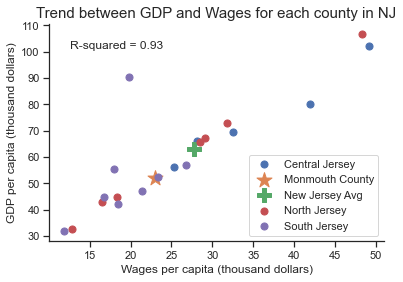

In [380]:
#Plotting section
import seaborn
seaborn.set(style='ticks')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_JoinF = pd.merge(df_JoinW, df_Join1, how='inner', left_on='County', right_on='County')
#Create a dictionary dividing the NJ counties into Regions in NJ
d = {
    'Bergen': 'North Jersey',
    'Sussex': 'North Jersey',
    'Passaic': 'North Jersey',
    'Hudson': 'North Jersey',
    'Essex': 'North Jersey',
    'Morris': 'North Jersey',
    'Warren': 'North Jersey',
    'Hunterdon': 'Central Jersey',
    'Somerset': 'Central Jersey',
    'Union': 'Central Jersey',
    'Middlesex': 'Central Jersey',
    'Mercer': 'Central Jersey',
    'Monmouth': 'Monmouth County',
    'Ocean': 'South Jersey',
    'Burlington': 'South Jersey',
    'Camden': 'South Jersey',
    'Atlantic': 'South Jersey',
    'Salem': 'South Jersey',
    'Gloucester': 'South Jersey',
    'Cumberland': 'South Jersey',
    'Cape May': 'South Jersey', 
    'New Jersey': 'New Jersey Avg'
}

df_JoinW['Region'] = df_JoinW['GeoName'].map(d)

colors = {'North Jersey':'red', 'Central Jersey':'green', 'South Jersey':'blue', 'Monmouth County':'yellow', 'New Jersey Avg':'black'}

#df_JoinF
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#from lmfit.models import LinearModel
plt.figure()

x = df_JoinF['Wages/POP'].values

y = df_JoinF['GDP/POP'].values

# Initialize the model
model = LinearRegression()

# Train the model - fit the data to the model
#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

result = model.fit(x_train, y_train)

# Predict
y_predicted = model.predict(x_test)
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

fig, ax = plt.subplots(1)
s= 30
#plt.plot(x_test, y_predicted, c='black', label='Trendline', linestyle = ':')
groups = df_JoinF.groupby("Region")
for name, group in groups:
    if name == 'New Jersey Avg':
        s = 190
        m = 'P'
    elif name == 'Monmouth County':
        s = 250
        m = '*' 
    else:
        s = 50
        m = 'o'
    plt.scatter(group["Wages/POP"], group["GDP/POP"], marker=m, label=name, s=s)
plt.legend()
plt.ylabel('GDP per capita (thousand dollars)')
plt.xlabel('Wages per capita (thousand dollars)')
plt.title('Trend between GDP and Wages for each county in NJ', fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)

#len(group['GDP/POP'])
plt.text(0.2, 0.9, 'R-squared = %0.2f' % r2,horizontalalignment='center',verticalalignment='center', transform = ax.transAxes)
plt.show()
